# Personal Medical Insurance Records Analysis

In this notebook, we are going to analyze the personal medical insurance records of people. This is a public dataset available in github here: https://github.com/stedy/Machine-Learning-with-R-datasets

**Source: Kaggle**. This dataset can be used to understand how different aspects of a person impacts the health insurance medical costs. This can also be used to predict health insurance costs of individuals based on relationship between them if needed. In this file, we are only analysing and summarizing our dataset.

The dataset contains the following columns:

- **age**: age of primary beneficiary

- **sex**: insurance contractor gender, female, male

- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- **children**: Number of children covered by health insurance / Number of dependents

- **smoker**: Smoking

- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- **charges**: Individual medical costs billed by health insurance

## Import necessary libraries and data

In [1]:
# import data and necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('insurance.csv')

Here we have directly used the donwloaded dataset by importing using Pandas library. For open datasets available in kaggle, we can also make use of opendatasets library if needed. See https://pypi.org/project/opendatasets/

## Data preparation and cleaning

- Look at information about the file
- Check the column names and Check if datatypes are matching
- Check and fix any missing or incorrect values if present 

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see from the above information, we **do not have any NULL values** in this dataset. We can also check if the datatypes for our 7 columns are correct or whether they need any change. There are a total of 1338 medical records here

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Numerical columns present in our dataset are age, BMI, children and charges. 

- Age ranges from 18 to 64 with mean age of ~39
- BMI values range from ~16 to ~53 with mean of ~31
- Charges ranges from as low as 1121 to as high as 63,770 with mean of 13,270 and median of 9,382. Since mean is greater than median, majority of our data is present in the left side of the histogram and hence is **right-skewed**

In [7]:
df.isnull().sum()

# Already know no NULL values are present. Just for standardized checklist

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Analysis and Visualization

We will analyze column-by-column in a brief way:

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1. Sex

In [9]:
df['sex'].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

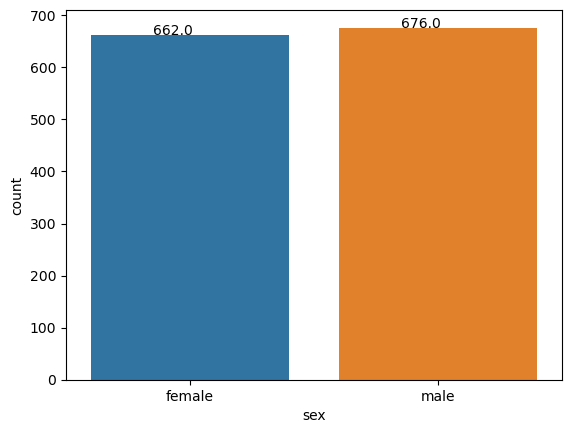

In [10]:
# sex column

ax = sns.countplot(data=df,x='sex',)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

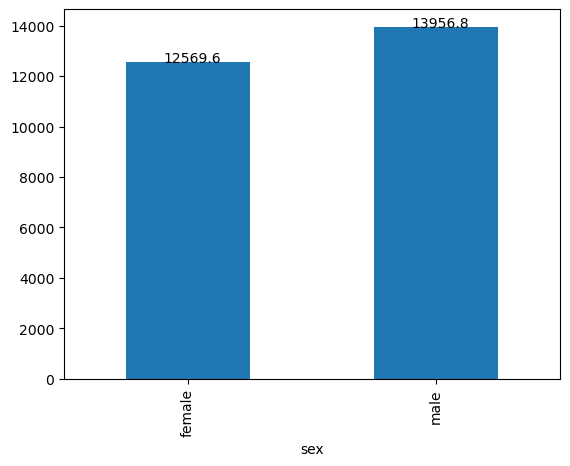

In [11]:
# sex column

ax=df.groupby(by='sex').mean()['charges'].plot(kind='bar')


for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()))

plt.show()

Ratio of male and female count is almost similar with 50.5% and 49.5% respectively. Also, the average medical charges for male is 11% (1,387) more than the average female medical charges

### 2. Age

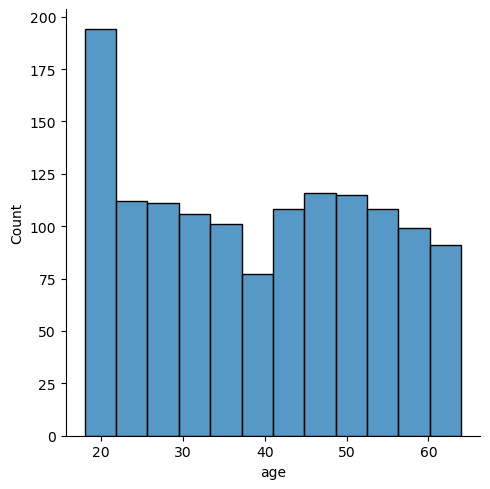

In [12]:
# age column

sns.displot(df['age'])

We can see that almost 200 records are of individuals with age around the range of 20. Other than that, we see almost similar count for all other age groups

### 3. Region

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

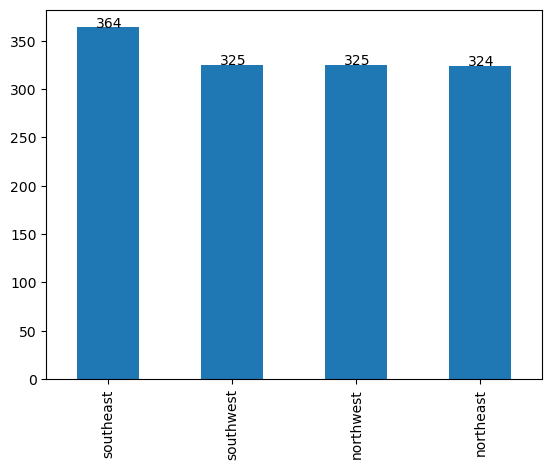

In [14]:
# region column

ax=df['region'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

plt.show()

As we can see from tha above graph, there are four regions: northeast,northwest,southeast,southwest. All of them are equally distributed in the dataset with counts ranging from 320 to 365 individuals

### 4. Smoker

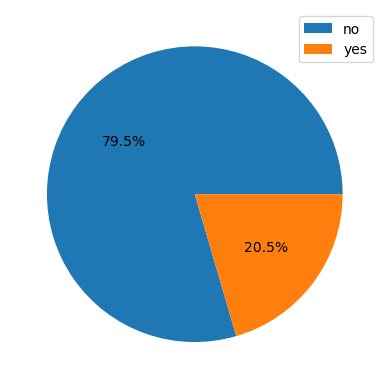

In [15]:
# smoker column

plt.pie(x=df['smoker'].value_counts(), autopct='%1.1f%%')
plt.legend(df['smoker'].value_counts().index)
plt.show()

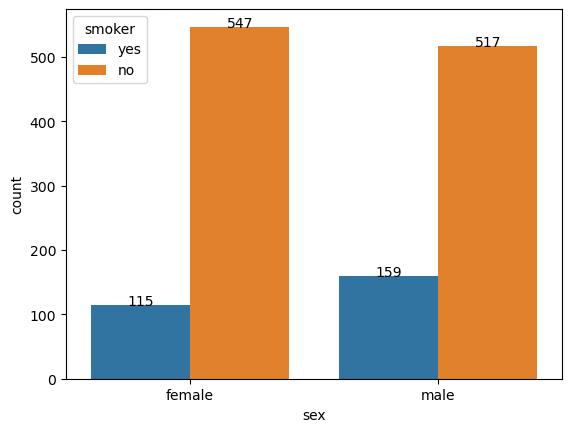

In [16]:
ax=sns.countplot(data=df,
    x="sex", hue="smoker")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

As we can see from the above graph, smokers make up 20.5% of the total dataset. As hypothized, male population has more smokers than female population

### 5. BMI

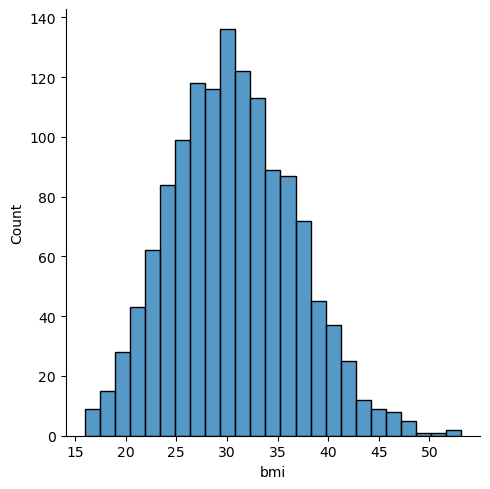

In [17]:
# bmi column

sns.displot(df['bmi'])

It seems that the BMI is normally distributed with peak around 30. For standards,
- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
- If your BMI is 25.0 to 29.9, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obese range.

In [18]:
obese_range=df[df['bmi'] > 30]['bmi'].count()
print(f'Out of 1338 medical records, {obese_range} individuals are falling under obese range')

Out of 1338 medical records, 705 individuals are falling under obese range


### 6. Children

In [19]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Answering curious questions about data

**1. Are obese individuals at more risk for higher medical charges?**

In [20]:
df['Obese']=np.where(df['bmi'] > 30, 'Yes', 'No')

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Obese
0,19,female,27.900,0,yes,southwest,16884.92400,No
1,18,male,33.770,1,no,southeast,1725.55230,Yes
2,28,male,33.000,3,no,southeast,4449.46200,Yes
3,33,male,22.705,0,no,northwest,21984.47061,No
4,32,male,28.880,0,no,northwest,3866.85520,No


<AxesSubplot:xlabel='Obese', ylabel='charges'>

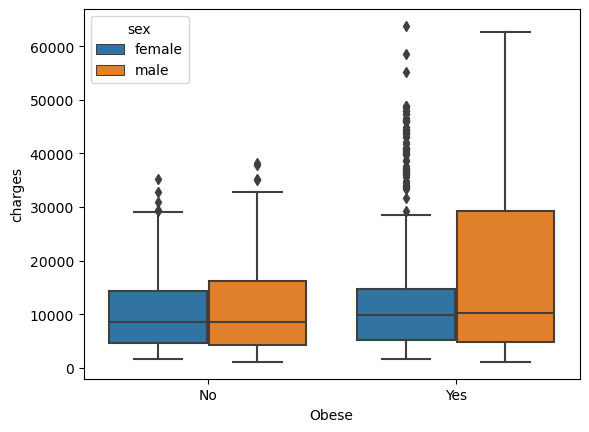

In [22]:
sns.boxplot(data=df,x='Obese',y='charges',hue='sex')

In [29]:
df.groupby('Obese').mean()['charges']

Obese
No     10719.386942
Yes    15560.926321
Name: charges, dtype: float64

We see that the average medical insurance charges of obese people is almost 50% more than the non-obese people. Also, the outliers and the maximum cap of the Obese charges are going up to more than 60,000 for Obese people.

**2. As the number of children increase, how does the charges vary on average?**

<AxesSubplot:xlabel='children'>

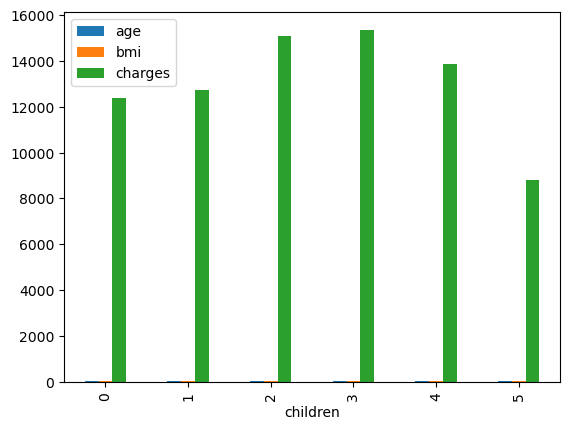

In [24]:
df.groupby('children').mean().plot(kind='bar')

In [25]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

As we can see from the above bar graph, as the number of children increases from 0 to 3 children, the insurance cost increases steadilt but decreases for 4 and 5 children categories. But this may be due to very low counts for 4 and 5 children with 25 and 18 individuals respectively

**3. Are smokers more prone to higher medical charges than non-smokers?**

<AxesSubplot:xlabel='smoker', ylabel='charges'>

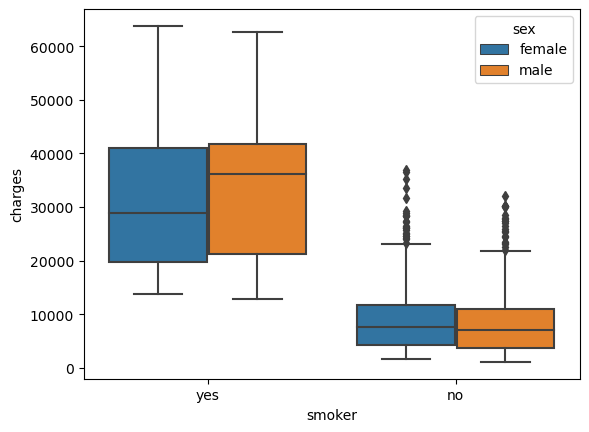

In [26]:
sns.boxplot(data=df,x='smoker',y='charges',hue='sex')

As we can see from the above graph, smokers are very highly associated with high insurance charges as expected due to health complications caused by smoking. Also, interesting to note, among smokers, the mean medical charges is slightly high for male individuals

**4. What is the correlation between the factors and the insurance costs?**

<AxesSubplot:>

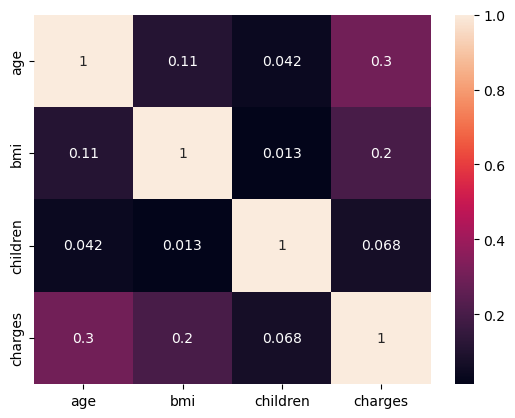

In [27]:
sns.heatmap(df.corr(),annot=True)

 Age and BMI have the highest correlation with medical charges in numerical. It seems logical that as we age, the probability of incurring medical costs become higher. Also, when BMI increases and touches Obese levels, associated medical costs are high. The data also proves this point. 

## Summary and conclusion

Here is quick summary of the inferences we have arrived through the analysis:

- The dataset has almost equal ratio of male and female count (50.5:49.5)
- Average medical charges for male is 11% (1,387) more than the average female medical charges
- There are four regions: northeast,northwest,southeast,southwest with almost equally distributed population in the dataset
- Smokers make up 20.5% of the total dataset. As hypothized, male population has more smokers than female population
- BMI is normally distributed with peak around 30. ~53% are falling under obese range
- Average medical insurance charges of obese people is almost 50% more than the non-obese people
- Increase in number of dependents increases medical cost of individual
- Smokers highly associated with high insurance charges as expected due to health complications caused by smoking
-  Age and BMI have the highest correlation with medical charges

## Areas for Future work

Apart from the above analyses, we can mainly work on prediction of charges by using the other variables as predictors in future!